Deep Learning
=============

Assignment 1
------------

This notebook contains my solutions to Assignment 1 of the [Udacity Deep Learning Course](https://www.udacity.com/course/deep-learning--ud730). I used the 1_notmnist.ipynb notebook to download and preprocess the data.  

In [17]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import os
import numpy as np
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves import cPickle as pickle

%matplotlib inline

Specify where the data is located.  (note the scripts to download and preprocess the data are in 1_notmnist.ipynb

In [18]:
train_folder='../data/notMNIST_small/'
test_folder='../data/notMNIST_large/'

---
Problem 2
---------

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot.

---

Here I load the data from the pickle file (see 1_notmnist.ipynb) and plot the image, the image histogram, and print out some basic statistics.

<type 'numpy.ndarray'>
(52909, 28, 28)


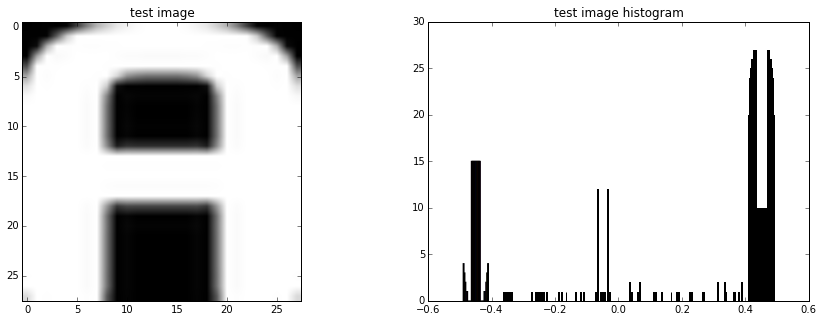


test image properties:
type <type 'numpy.ndarray'>
data type float32
shape (28, 28)
min -0.5
max 0.5
mean 0.220433


In [5]:
Apickle=pickle.load(open(test_folder+"A.pickle"))

print(type(Apickle))
print(Apickle.shape)

testImage=Apickle[363,:]

fig=plt.figure(figsize=(15,5))
plt.subplot(121)
imgplot=plt.imshow(testImage, cmap='gray')
plt.title('test image')
plt.subplot(122)
plt.hist(testImage)
plt.title('test image histogram')
plt.show()


print()
print ("test image properties:")
print ("type",type(testImage))
print ("data type",testImage.dtype)
print ("shape",testImage.shape)
print ("min",testImage.min())
print ("max",testImage.max())
print ("mean",testImage.mean())


---
Problem 3
---------
Another check: we expect the data to be balanced across classes. Verify that.

---

I just load all the pickle files for each letter, print out their size, and verify they are all roughly the same size.

In [6]:
# print out the size for each letter and verify the data-sizes are balanced

for pickle_file in os.listdir(test_folder):
    if pickle_file.endswith('.pickle'):
        test_pickle=pickle.load(open(test_folder+pickle_file))
        print(test_pickle.shape)

(52911, 28, 28)
(52912, 28, 28)
(52912, 28, 28)
(52911, 28, 28)
(52912, 28, 28)
(52909, 28, 28)
(52912, 28, 28)
(52911, 28, 28)
(52912, 28, 28)
(52912, 28, 28)


---
Problem 4
---------
Convince yourself that the data is still good after shuffling!

---

Here I load the data from the shuffled and merged pickle file that was created with 1_notmnist.ipynb

In [7]:
pickle_file = '../data/notMNIST.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


To check the data I create a function that plots a few images (I'll re-use this function later).  I set a starting index, then plot 9 images from *start* to *start+9*, and print the label for image.  That way I can verify the labels match the image. Some of them are actually pretty tricky.  For example if image 17896 appears to be an *A* hidden upside down in a bycicle.

(200000, 28, 28)
(200000,)
h  h  j  c  e  b  d  g  g  

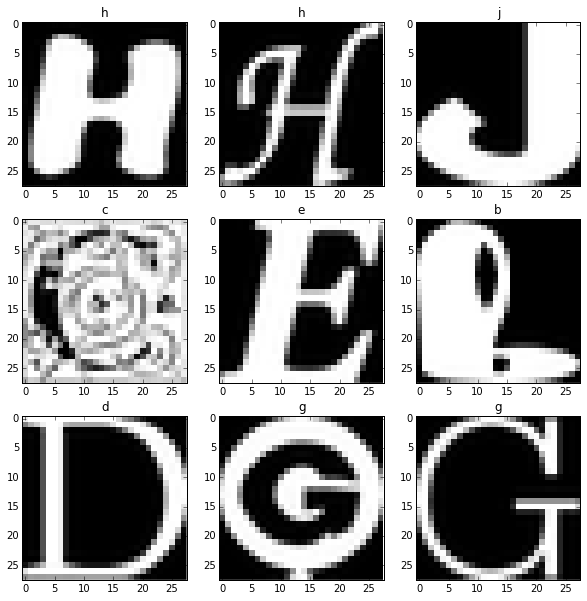

In [9]:
%matplotlib inline

print(train_dataset.shape)
print(train_labels.shape)

#start=17892
start=9845
#start=300

letters=['a','b','c','d','e','f','g','h','i','j']

for num in range(start, start+9):
    print(letters[train_labels[num]]," ", end="")
print

def plot_results(start, images, labels, result=None):
    fig=plt.figure(figsize=(10,10))

    i=331
    
    for num in range(start, start+9):
        plt.subplot(i)
        i=i+1
        plt.imshow(images[num,:], cmap='gray',interpolation='none')
        
        label=letters[labels[num]]
        if (result!=None):
            label=label+" ("+letters[result[num]]+")"
        plt.title(label)
        
plot_results(start, train_dataset, train_labels)



In [10]:
test_images=train_dataset[start:start+90,:]
test_vector_small=test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2]) 
print (test_vector_small.shape)
np.savetxt("letter.csv", test_vector_small, delimiter=",")

(90, 784)


---
Problem 5
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.

Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

---
Problem 6
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

I followed this [scikit-learn example](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction).  They train a support vector machine to recognize hand written digits.  It was relatively easy to modify the example for the *notMNIST* set. 

In [10]:
# first import support vector machine and use the same settings as the tutorial
from sklearn import svm
from sklearn.metrics import accuracy_score

clf=svm.SVC(gamma=0.001, C=100)

reshape so each *n x n* image is a *nn x 1* vector 

In [11]:
train_vector=train_dataset.reshape(train_dataset.shape[0],train_dataset.shape[1]*train_dataset.shape[2]) 

Now define a function that trains the model for a given training size

In [12]:
from sklearn import datasets, neighbors, linear_model

def train_models(train_size, train_vector, train_labels):

    train_vector_small=train_vector[:train_size,:]
    train_labels_small=train_labels[:train_size]
    
    clf=svm.SVC(gamma=0.001, C=100)
    logistic = linear_model.LogisticRegression()
    
    clf.fit(train_vector_small, train_labels_small)
    logistic.fit(train_vector_small, train_labels_small)
    
    return clf, logistic

Create a test set

In [13]:
test_size=100
test_images=test_dataset[:test_size,:]

test_vector_small=test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2]) 
test_labels_small=test_labels[:test_size]

Try training the model with different test sets

In [14]:
train_sizes=[50,100,1000,5000]

for train_size in train_sizes:
    clf, logistic=train_models(train_size, train_vector, train_labels)
    predictions_svm=clf.predict(test_vector_small)
    predictions_log=logistic.predict(test_vector_small)
    
    
    print ("support vector")
    print ("train size: ",train_size,"has accuracy:",accuracy_score(test_labels_small, predictions_svm))
    print
    print ("logistic")
    print ("train size: ",train_size,"has accuracy:",accuracy_score(test_labels_small, predictions_log))
    

support vector
train size:  50 has accuracy: 0.7
logistic
train size:  50 has accuracy: 0.75
support vector
train size:  100 has accuracy: 0.74
logistic
train size:  100 has accuracy: 0.75
support vector
train size:  1000 has accuracy: 0.89
logistic
train size:  1000 has accuracy: 0.87
support vector
train size:  5000 has accuracy: 0.9
logistic
train size:  5000 has accuracy: 0.89


Finally let's plot a sample of images with labels and predictions... we can get an idea of which images it may be failing on

/home/bnorthan/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


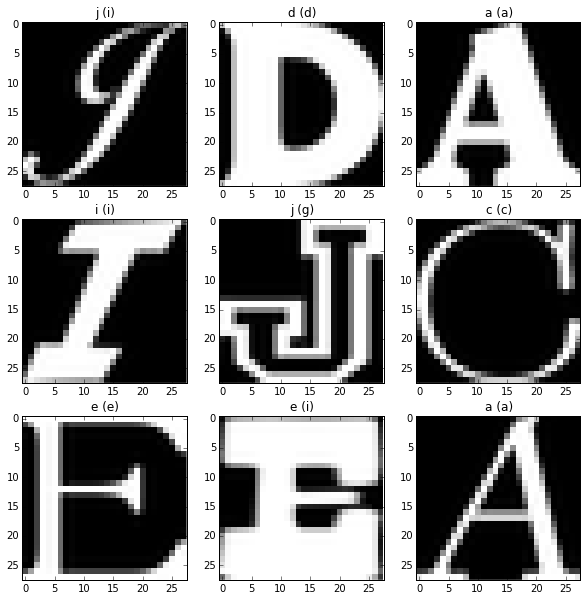

In [16]:
plot_results(30, test_images, test_labels_small, predictions_svm)

/home/bnorthan/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


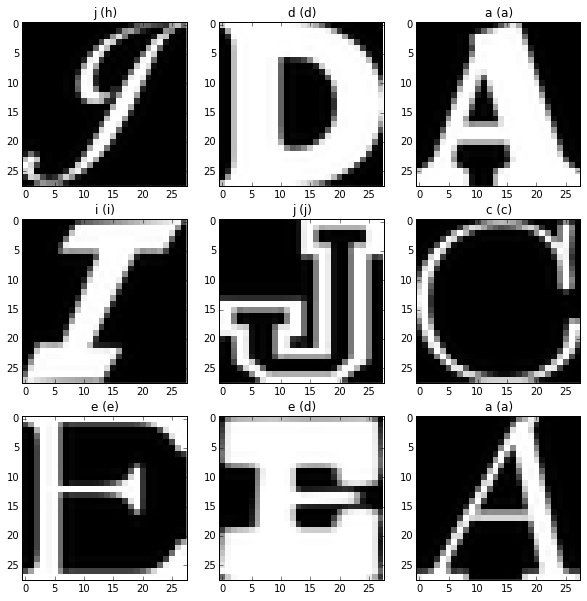

In [19]:
plot_results(30, test_images, test_labels_small, predictions_log)

In [21]:
28*28

784

In [22]:
784*2

1568